# ข้อ 1

In [5]:
import git

git.Repo.clone_from('https://github.com/ardamavi/Sign-Language-Digits-Dataset.git', 'Sign-Language-Digits-Dataset')

<git.repo.base.Repo 'd:\\Python_For_ML\\Machine-Learning2658\\ALLLAB\\Lab7\\Sign-Language-Digits-Dataset\\.git'>

# ข้อ 2

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.1)

train_gen = datagen.flow_from_directory(
    'Sign-Language-Digits-Dataset/Dataset',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    'Sign-Language-Digits-Dataset/Dataset',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1862 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


# ข้อ 3

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

base_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(100, 100, 3))
for layer in base_vgg.layers:
    layer.trainable = False

print("Output shape ของ VGG16 base:", base_vgg.output_shape)
print("จำนวน trainable params ของ VGG16 base:", sum([w.count_params() for w in base_vgg.trainable_weights]))
base_vgg.summary()

Output shape ของ VGG16 base: (None, 3, 3, 512)
จำนวน trainable params ของ VGG16 base: 0


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# ข้อ 4

In [8]:
x = GlobalAveragePooling2D()(base_vgg.output)
x = Dense(512, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(10, activation="softmax")(x)  # 10 classes

model_vgg = Model(inputs=base_vgg.input, outputs=output)

opt = SGD(learning_rate=0.0001)
model_vgg.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

model_vgg.summary()

history_vgg = model_vgg.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen
)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,010,826 (57.26 MB)

 Trainable params: 296,138 (1.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 49s 802ms/step - accuracy: 0.1044 - loss: 2.3517 - val_accuracy: 0.1050 - val_loss: 2.3528
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 528ms/step - accuracy: 0.1005 - loss: 2.3509 - val_accuracy: 0.1100 - val_loss: 2.3404
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 32s 547ms/step - accuracy: 0.1113 - loss: 2.3301 - val_accuracy: 0.1300 - val_loss: 2.3299
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 527ms/step - accuracy: 0.1114 - loss: 2.3067 - val_accuracy: 0.1300 - val_loss: 2.3214
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 518ms/step - accuracy: 0.1400 - loss: 2.2977 - val_accuracy: 0.1400 - val_loss: 2.3142
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 507ms/step - accuracy: 0.1444 - loss: 2.3024 - val_accuracy: 0.1600 - val_loss: 2.3083
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 31s 532ms/step - accuracy: 0.1648 - loss: 2.2905 - val_accuracy: 0.1650 - val_loss: 2.3034
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 500ms/step - accuracy: 0.1864 - loss: 2.2779 - val_accu

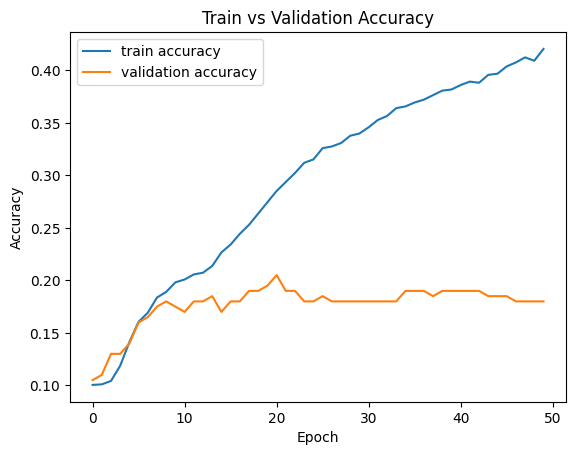

In [10]:
import matplotlib.pyplot as plt

plt.plot(history_vgg.history['accuracy'], label="train accuracy")
plt.plot(history_vgg.history['val_accuracy'], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train vs Validation Accuracy")
plt.show()

# ข้อ 5

In [11]:
model_vgg.save("sign_vgg.h5")